In [90]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

* **1.Load HR-Employee-Attrition.csv dataset and create an ensemble ML model for predicting target variable (Attrition). Report the performance of the model using appropriate metrics.**

In [91]:
#Read data
df = pd.read_csv('HR-Employee-Attrition.csv')

In [92]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [94]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [95]:
#Check null data
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [96]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

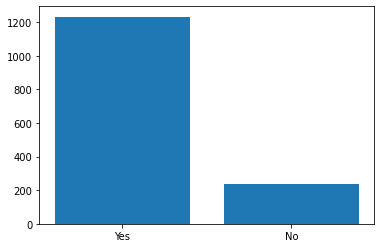

In [97]:
plt.bar(df['Attrition'].unique(),df['Attrition'].value_counts())
plt.show()

In [98]:
#Split features and labels
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [99]:
#Get columns names which have object type
X_object_dtype = X.select_dtypes(include=[np.object_])
object_columns = X_object_dtype.columns.to_list()
object_columns

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [100]:
#Assign dummies to categorical data
X = pd.get_dummies(X, drop_first=True, columns=object_columns)

In [101]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
#Normalize data
sc = StandardScaler()
sc.fit(X)
columns = X.columns
df = pd.DataFrame(sc.transform(X), columns=columns)

In [104]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [106]:
#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [107]:
#Build random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

print(f'Accuracy score-Train data: {accuracy_score(y_train, rf_model.predict(X_train)):.2f}')
print(f'Accuracy score-Test data: {accuracy_score(y_test, rf_model.predict(X_test)):.2f}')
print('Classification report: \n', classification_report(y_test, rf_model.predict(X_test)))

Accuracy score-Train data: 1.00
Accuracy score-Test data: 0.87
Classification report: 
               precision    recall  f1-score   support

          No       0.87      0.99      0.93       380
         Yes       0.62      0.08      0.14        61

    accuracy                           0.87       441
   macro avg       0.75      0.54      0.54       441
weighted avg       0.84      0.87      0.82       441



**From the report we can see that the accuracy for Attrition No is pretty high while Yes is pretty low. Let's do some hyperparameter tunning to improve the model.

* **2.Have you used any hyperparameter tuning while building the model in Q1? If so then plot your performance metrics for different hyperparmeter values that you have used in Q1**

In [108]:
#find tree max depth
print(rf_model.max_depth)

None


**By default max_depth is None, let's try different max_depth**

In [109]:
#Find the suitable max_depth
scores = pd.DataFrame(columns=['Max depth', 'Train Data', 'Test Data'])

for i in range(1, 100):
    rf_model = RandomForestClassifier(max_depth=i, random_state=42)
    rf_model.fit(X_train,y_train)
    train_score = rf_model.score(X_train, y_train).round(2)
    test_score = rf_model.score(X_test, y_test).round(2)
    new_row = pd.DataFrame({'Max depth': i, 'Train Data':train_score, 'Test Data': test_score}, index=[0])
    scores = scores.append(new_row, ignore_index=True)

In [110]:
scores

,Max depth,Train Data,Test Data
0,1,0.83,0.86
1,2,0.83,0.86
2,3,0.84,0.86
3,4,0.86,0.87
4,5,0.87,0.86
...,...,...,...
94,95,1.00,0.87
95,96,1.00,0.87
96,97,1.00,0.87
97,98,1.00,0.87


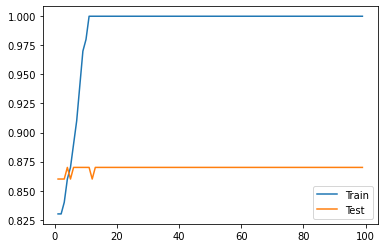

In [111]:
plt.plot(scores['Max depth'], scores['Train Data'], label = 'Train')
plt.plot(scores['Max depth'], scores['Test Data'], label = 'Test')
plt.legend()
plt.show()

**Max depth does not really affect test set while train test will have maximum score when max depth is above 10**

In [120]:
#Rebuild the model with max_depth = 10
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

print(f'Accuracy score-Train data: {accuracy_score(y_train, rf_model.predict(X_train)):.2f}')
print(f'Accuracy score-Test data: {accuracy_score(y_test, rf_model.predict(X_test)):.2f}')
print('Classification report: \n', classification_report(y_test, rf_model.predict(X_test)))

Accuracy score-Train data: 1.00
Accuracy score-Test data: 0.87
Classification report: 
               precision    recall  f1-score   support

          No       0.88      0.99      0.93       380
         Yes       0.78      0.11      0.20        61

    accuracy                           0.87       441
   macro avg       0.83      0.55      0.57       441
weighted avg       0.86      0.87      0.83       441



**As we can see that, by changing max_depth to 10, the accuracy score of Yes has been increased significantly**

**Let's do another tuning with min_samples_split**

In [113]:
split_list = [2,4,6,8,10]
scores_2 = pd.DataFrame(columns=['Min Samples Split', 'Train Data', 'Test Data'])

for split in split_list:
    rf_model = RandomForestClassifier(min_samples_split = split, random_state=42)
    rf_model.fit(X_train,y_train)
    train_score = rf_model.score(X_train, y_train).round(2)
    test_score = rf_model.score(X_test, y_test).round(2)
    new_row = pd.DataFrame({'Min Samples Split': split, 'Train Data':train_score, 'Test Data': test_score}, index=[0])
    scores = scores.append(new_row, ignore_index=True)

In [114]:
scores

,Max depth,Train Data,Test Data,Min Samples Split
0,1,0.83,0.86,NaN
1,2,0.83,0.86,NaN
2,3,0.84,0.86,NaN
3,4,0.86,0.87,NaN
4,5,0.87,0.86,NaN
...,...,...,...,...
99,NaN,1.00,0.87,2.0
100,NaN,0.99,0.87,4.0
101,NaN,0.97,0.87,6.0
102,NaN,0.95,0.87,8.0


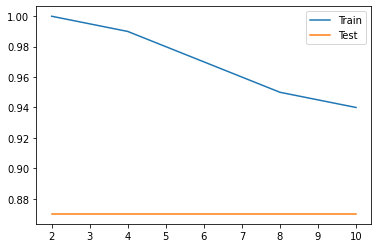

In [115]:
plt.plot(scores['Min Samples Split'], scores['Train Data'], label = 'Train')
plt.plot(scores['Min Samples Split'], scores['Test Data'], label = 'Test')
plt.legend()
plt.show()

**Score for test is pretty constant while train scores are decreasing when min_samples_slit increasing**

**Let's do random search cross validation the find the best combination of parameters**

In [116]:
#Random Search Cross Validation to find the best parameters
from sklearn.model_selection import RandomizedSearchCV

#Number of trees
n_estimators = np.arange(10,1000,10)
#Number of features
max_features = [None, 'auto', 'sqrt', 'log2']
# Max depth level of the search trees
max_depth = np.arange(1,100,5)
# Minimum samples to split
min_samples_split = [2, 5, 10]
# Minimum samples of each leaf
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Random search grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [117]:
#build random forest model using the random grid
rf_model = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,...
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   random_state=42, verbose=2)

In [121]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=False, max_depth=16, max_features='log2')


In [118]:
rf_model = rf_random.best_estimator_

print(f'Accuracy score-Train data: {accuracy_score(y_train, rf_model.predict(X_train)):.2f}')
print(f'Accuracy score-Test data: {accuracy_score(y_test, rf_model.predict(X_test)):.2f}')
print('Classification report: \n', classification_report(y_test, rf_model.predict(X_test)))

Accuracy score-Train data: 1.00
Accuracy score-Test data: 0.87
Classification report: 
               precision    recall  f1-score   support

          No       0.88      0.99      0.93       380
         Yes       0.78      0.11      0.20        61

    accuracy                           0.87       441
   macro avg       0.83      0.55      0.57       441
weighted avg       0.86      0.87      0.83       441



* **3.Reflect on the importance of hyperparameter tuning of ML models based on your ML model development exercise.**

**As we can see that hyperparameter tuning can definitely change the performance of machine learning model. For example from previous tuning, by changing max_depth from default to 10, the accuracy of Yes Attrition has changed from 62% to 78%. And by using Random Search Cross Validtion, I have found a best combination for the Random Forest model**